In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive
!git clone https://github.com/ultralytics/yolov5

/content/drive/MyDrive
Cloning into 'yolov5'...
remote: Enumerating objects: 17493, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 17493 (delta 1), reused 0 (delta 0), pack-reused 17490 (from 3)
Receiving objects: 100% (17493/17493), 16.54 MiB | 19.03 MiB/s, done.
Resolving deltas: 100% (11989/11989), done.


In [2]:
%cd /content/drive/MyDrive/yolov5
!pip install -r requirements.txt

/content/drive/MyDrive/yolov5


In [4]:
%cd /content/drive/MyDrive/yolov5
!git clone https://github.com/pagi1377/ML

/content/drive/MyDrive/yolov5
Cloning into 'ML'...
remote: Enumerating objects: 2449, done.
remote: Total 2449 (delta 0), reused 0 (delta 0), pack-reused 2449 (from 1)
Receiving objects: 100% (2449/2449), 1.75 GiB | 22.27 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Updating files: 100% (6122/6122), done.


In [5]:
!pip install wandb

In [7]:
%cd /content/drive/MyDrive/yolov5
!python train.py \
  --img 640 \
  --batch 32 \
  --epochs 250 \
  --data /content/drive/MyDrive/yolov5/ML/dataset_balanced/train_data/data.yaml \
  --weights yolov5m.pt \
  --name y5m \
  --cache \
  --workers 4 \
  --patience 30 \
  --hyp data/hyps/hyp.scratch-high.yaml \
  --project runs/y5s_med \
  --save-period 50 \
  --bbox_interval 30

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  with torch.cuda.amp.autocast(amp):
    210/249      13.3G    0.02488   0.007235   0.004816        177        640:   3% 2/59 [00:01<00:46,  1.23it/s]/content/drive/MyDrive/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
    210/249      13.3G      0.024   0.007164   0.004911        132        640:   5% 3/59 [00:02<00:46,  1.21it/s]/content/drive/MyDrive/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
    210/249      13.3G    0.02489   0.006984   0.004719        188        640:   7% 4/59 [00:03<00:44,  1.23it/s]/content/drive/MyDrive/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` i

In [3]:
!python val.py \
--weights /content/drive/MyDrive/yolov5/runs/y5s_med/y5m2/weights/best.pt \
--data /content/drive/MyDrive/yolov5/ML/dataset_balanced/train_data/data.yaml \
--img 640 \
--conf 0.001 \
--iou 0.65 \
--project yolov5_eval \
--name my_model_eval \
--save-json \
--exist-ok

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
val: data=/content/drive/MyDrive/yolov5/ML/dataset_balanced/train_data/data.yaml, weights=['/content/drive/MyDrive/yolov5/runs/y5s_med/y5m2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=yolov5_eval, name=my_model_eval, exist_ok=True, half=False, dnn=False
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 212 layers, 20966082 parameters, 0 gradients, 48.2 GFLOPs
100% 755k/755k [00:00<00:00, 14.7MB/s]
val: Scanning /content/drive/MyDrive/

In [5]:
import os
import cv2
import matplotlib.pyplot as plt
from glob import glob

# ==== Thiết lập đường dẫn ====
weights_path = '/content/drive/MyDrive/yolov5/runs/y5s_med/y5m2/weights/best.pt'
source_folder = '/content/drive/MyDrive/yolov5/ML/dataset_balanced/train_data/images/test'

# ==== Chạy detect ====
!python detect.py --weights {weights_path} --source {source_folder} --conf 0.25 --img 640 --save-txt --save-conf

detect: weights=['/content/drive/MyDrive/yolov5/runs/y5s_med/y5m2/weights/best.pt'], source=/content/drive/MyDrive/yolov5/ML/dataset_balanced/train_data/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 212 layers, 20966082 parameters, 0 gradients, 48.2 GFLOPs
image 1/90 /content/drive/MyDrive/yolov5/ML/dataset_balanced/train_data/images/test/11508.png: 256x640 4 no u and left turns, 2 slow warnings, 703.8ms
image 2/90 /content/drive/MyDrive/yolov5/ML/dataset_balanced/train_data/images/test/11881.png: 256x640

<Figure size 1500x1000 with 0 Axes>

Showing results from: /content/drive/MyDrive/yolov5/runs/detect/exp
Displaying image: /content/drive/MyDrive/yolov5/runs/detect/exp/3348.png


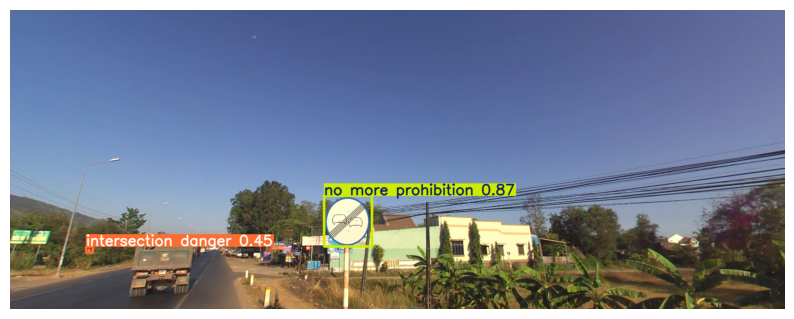

Displaying image: /content/drive/MyDrive/yolov5/runs/detect/exp/3363.png


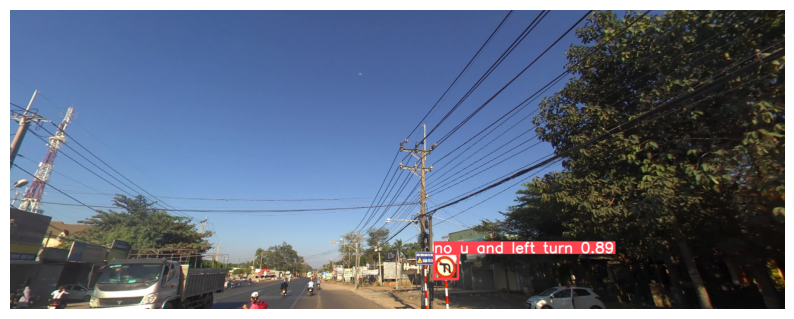

Displaying image: /content/drive/MyDrive/yolov5/runs/detect/exp/3613.png


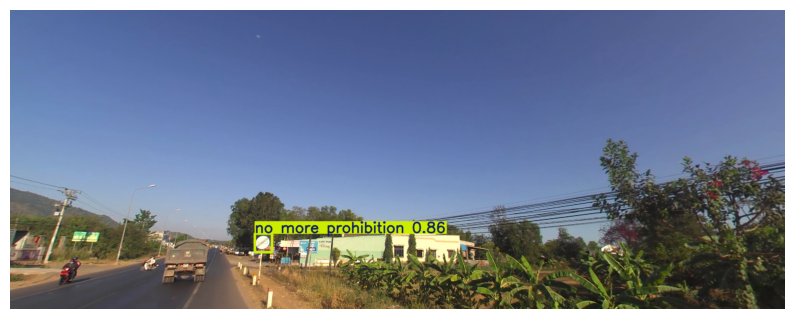

Displaying image: /content/drive/MyDrive/yolov5/runs/detect/exp/3716.png


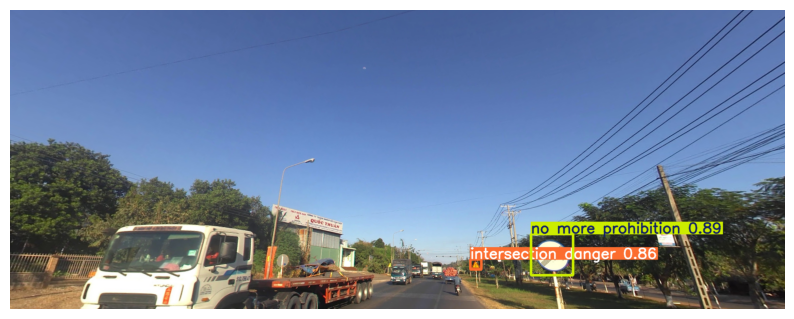

Displaying image: /content/drive/MyDrive/yolov5/runs/detect/exp/394.png


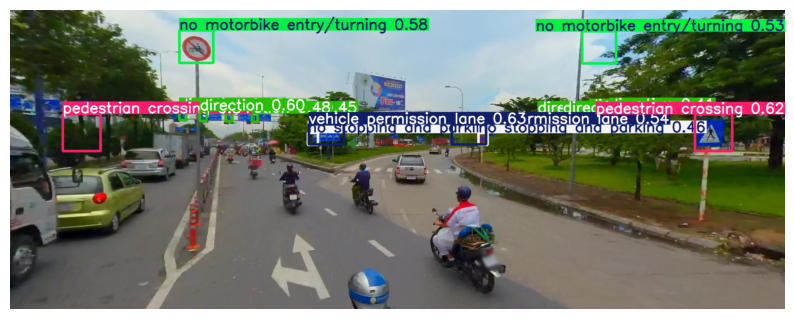

Showing evaluation graphs from: /content/drive/MyDrive/yolov5/yolov5_eval/my_model_eval
Displaying graph: /content/drive/MyDrive/yolov5/yolov5_eval/my_model_eval/F1_curve.png


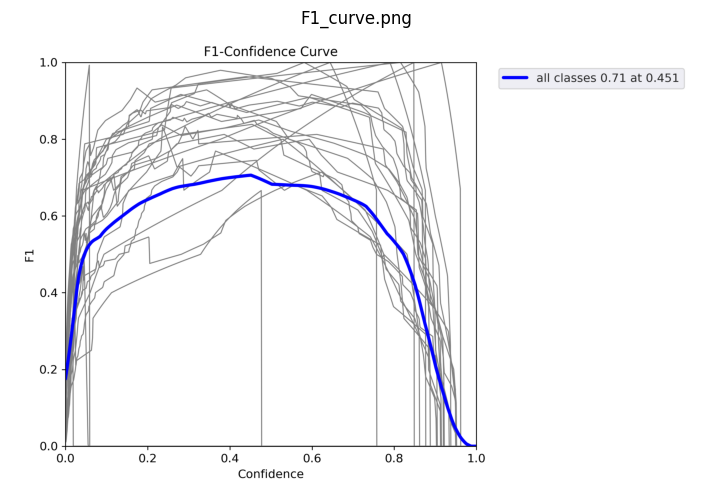

Displaying graph: /content/drive/MyDrive/yolov5/yolov5_eval/my_model_eval/R_curve.png


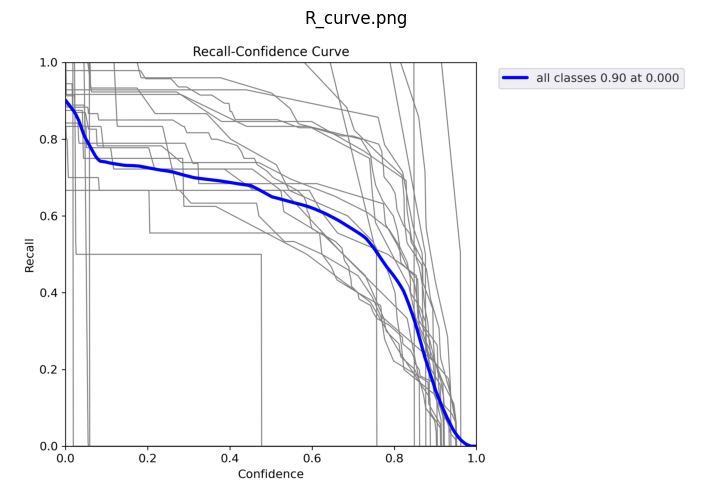

Displaying graph: /content/drive/MyDrive/yolov5/yolov5_eval/my_model_eval/P_curve.png


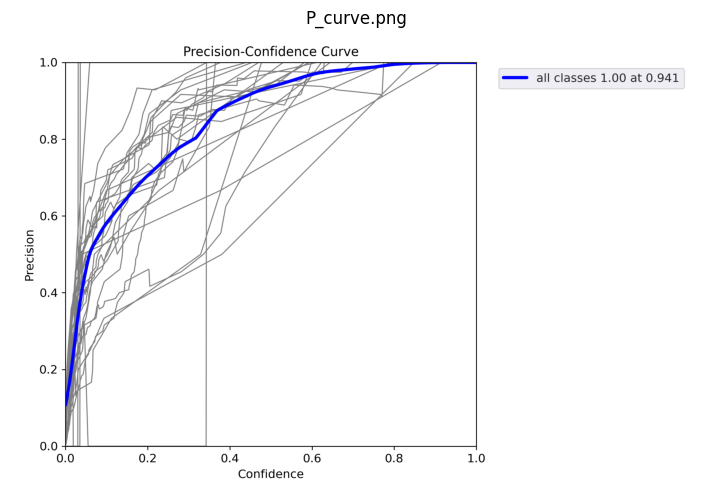

Displaying graph: /content/drive/MyDrive/yolov5/yolov5_eval/my_model_eval/PR_curve.png


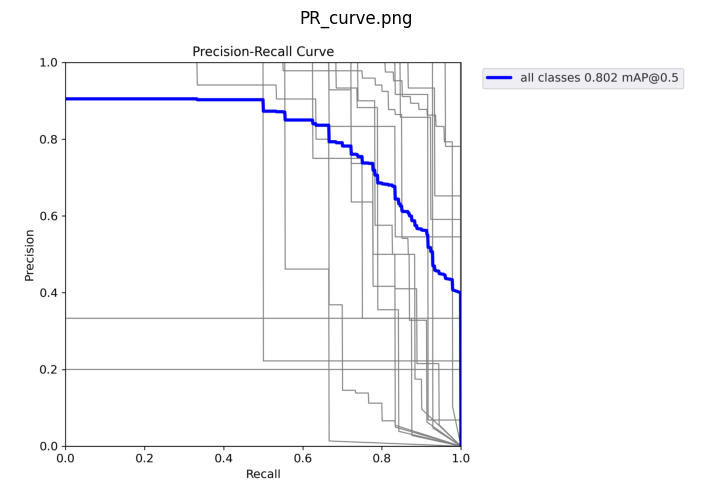

Displaying graph: /content/drive/MyDrive/yolov5/yolov5_eval/my_model_eval/confusion_matrix.png


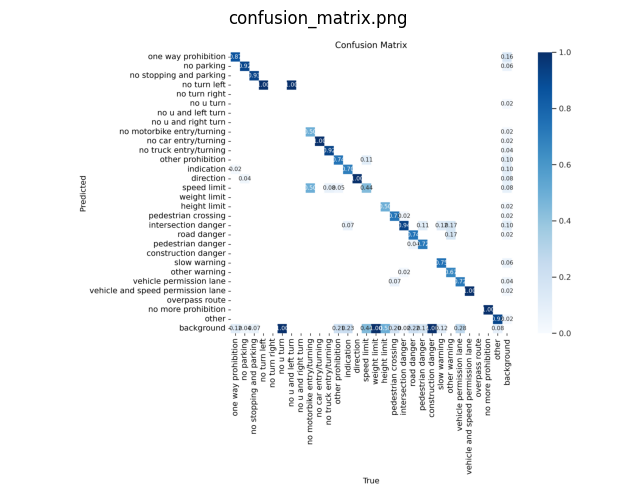

Showing training graphs from: /content/drive/MyDrive/yolov5/runs/y5s_med/y5m2
Displaying training graph: /content/drive/MyDrive/yolov5/runs/y5s_med/y5m2/PR_curve.png


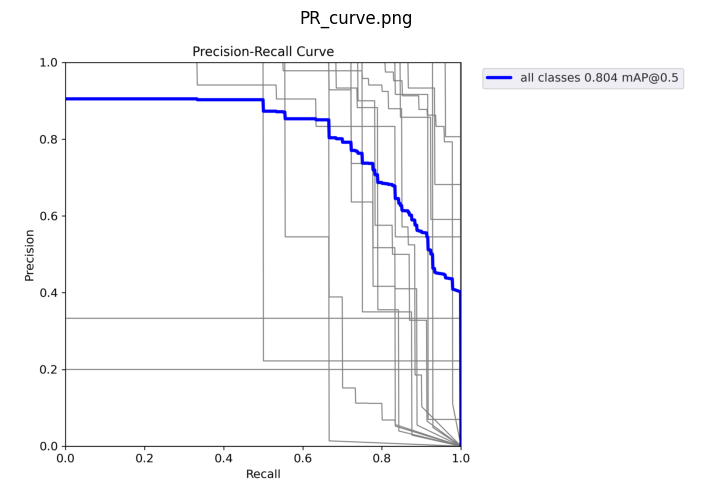

Displaying training graph: /content/drive/MyDrive/yolov5/runs/y5s_med/y5m2/R_curve.png


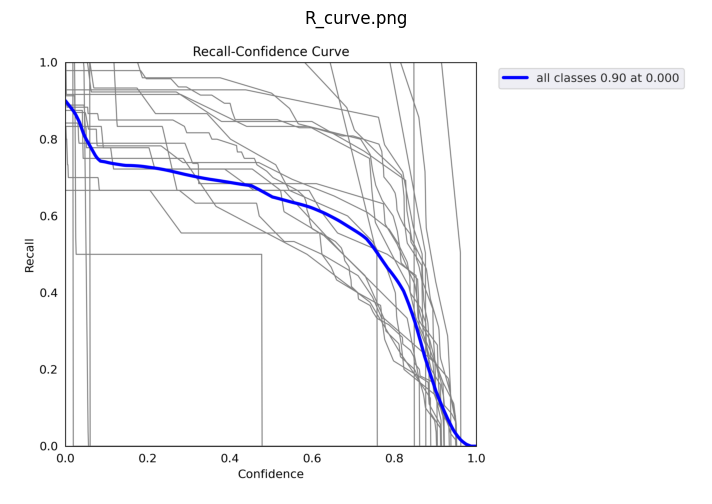

Displaying training graph: /content/drive/MyDrive/yolov5/runs/y5s_med/y5m2/P_curve.png


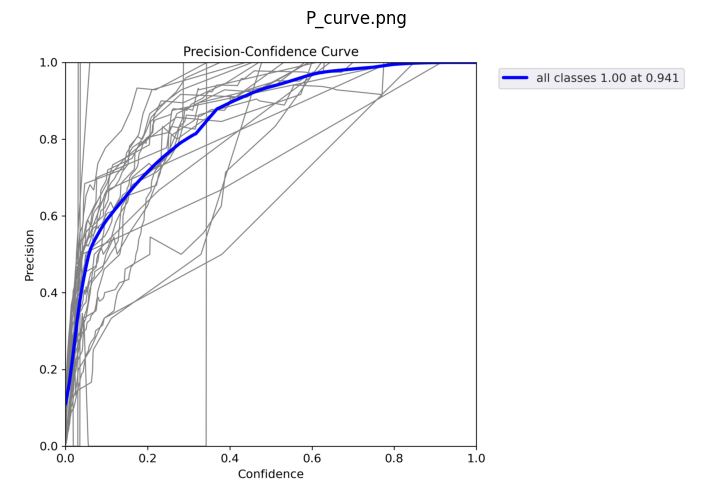

Displaying training graph: /content/drive/MyDrive/yolov5/runs/y5s_med/y5m2/F1_curve.png


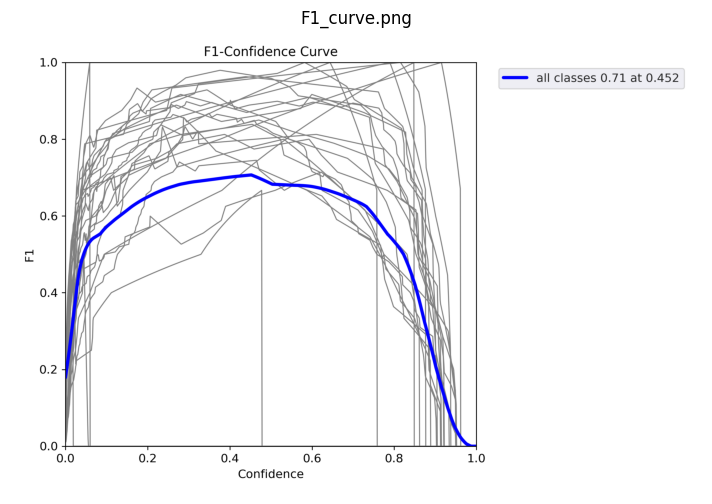

Displaying training graph: /content/drive/MyDrive/yolov5/runs/y5s_med/y5m2/confusion_matrix.png


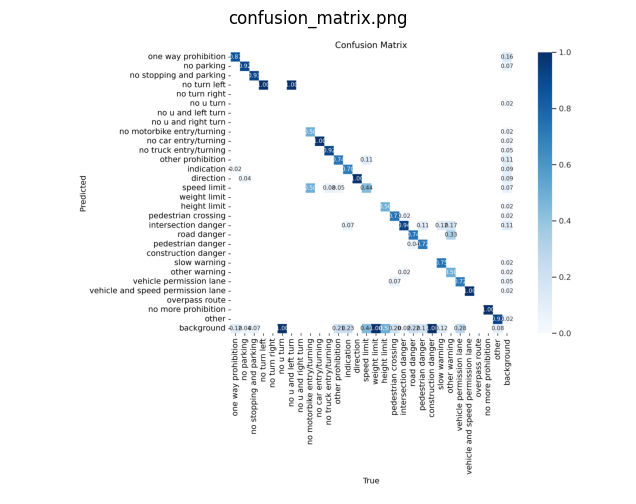

Displaying training graph: /content/drive/MyDrive/yolov5/runs/y5s_med/y5m2/results.png


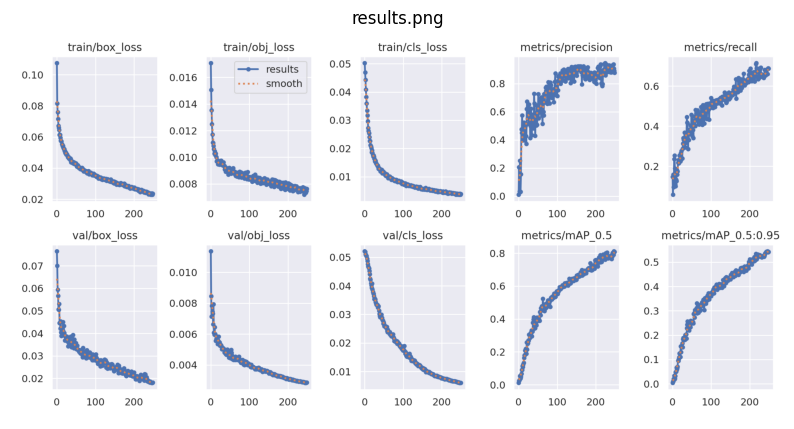

In [7]:


# Tìm thư mục chứa kết quả detect mới nhất
detect_results_dirs = sorted(glob('/content/drive/MyDrive/yolov5/runs/detect/*'))
if detect_results_dirs:
  latest_detect_dir = detect_results_dirs[-1]
  print(f"Showing results from: {latest_detect_dir}")

  # Hiển thị hình ảnh kết quả detect
  image_files = glob(f"{latest_detect_dir}/*.jpg") + glob(f"{latest_detect_dir}/*.png")
  if image_files:
    for img_path in image_files[7:12]: # Hiển thị tối đa 5 ảnh
      print(f"Displaying image: {img_path}")
      img = cv2.imread(img_path)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      plt.figure(figsize=(10, 10))
      plt.imshow(img)
      plt.axis('off')
      plt.show()
  else:
    print("No image files found in the detect results directory.")

else:
  print("No detect results directory found.")

# Tìm thư mục chứa kết quả eval mới nhất
eval_results_dirs = sorted(glob('/content/drive/MyDrive/yolov5/yolov5_eval/*'))
if eval_results_dirs:
    latest_eval_dir = eval_results_dirs[-1]
    print(f"Showing evaluation graphs from: {latest_eval_dir}")

    # Hiển thị đồ thị kết quả eval
    eval_graph_files = glob(f"{latest_eval_dir}/*.png")
    if eval_graph_files:
        for graph_path in eval_graph_files:
            print(f"Displaying graph: {graph_path}")
            img = cv2.imread(graph_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.figure(figsize=(10, 6))
            plt.imshow(img)
            plt.axis('off')
            plt.title(os.path.basename(graph_path))
            plt.show()
    else:
        print("No graph files found in the evaluation results directory.")
else:
    print("No evaluation results directory found.")

# Hiển thị đồ thị kết quả train
train_results_dirs = sorted(glob('/content/drive/MyDrive/yolov5/runs/y5s_med/*'))
if train_results_dirs:
    # Giả định thư mục train mới nhất là thư mục cuối cùng
    latest_train_dir = train_results_dirs[-1]
    print(f"Showing training graphs from: {latest_train_dir}")

    train_graph_files = glob(f"{latest_train_dir}/*.png")
    if train_graph_files:
        for graph_path in train_graph_files:
            # Bỏ qua các ảnh bounding box
            if 'bbox_example' not in graph_path:
                print(f"Displaying training graph: {graph_path}")
                img = cv2.imread(graph_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                plt.figure(figsize=(10, 6))
                plt.imshow(img)
                plt.axis('off')
                plt.title(os.path.basename(graph_path))
                plt.show()
    else:
        print("No training graph files found in the training results directory.")
else:
    print("No training results directory found.")